In [ ]:
!pip install scipy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scienceplots

plt.style.use(('science','no-latex'))
plt.rcParams['axes.unicode_minus'] = False

C:\Users\thoma\AppData\Local\Temp\ipykernel_9776\3352157302.py:11: RuntimeWarning: invalid value encountered in log
  transformed = np.log(-np.log(x))


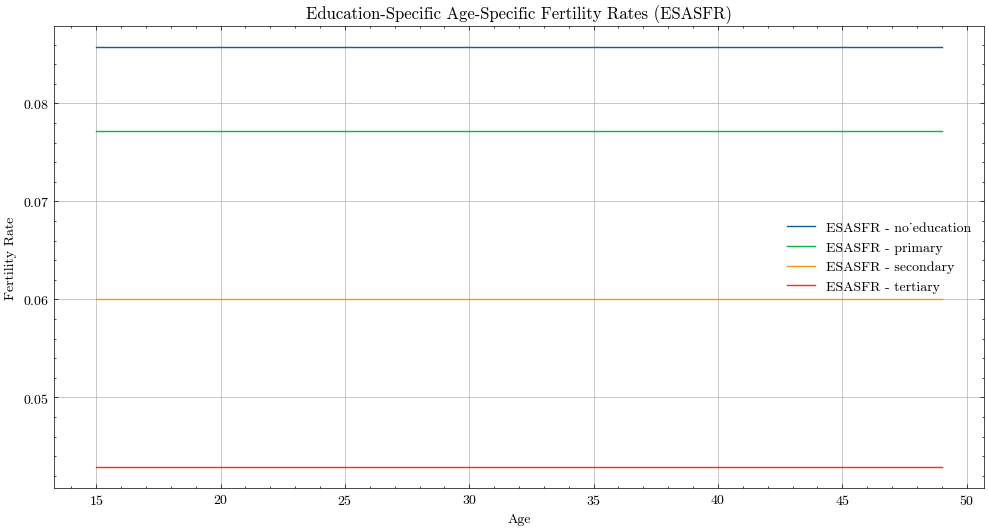

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the Gompertz function
def gompertz(x, a, b):
    return np.exp(-np.exp(a - b * x))

# Define the Gompit transformation
def gompit(x):
    transformed = np.log(-np.log(x))
    # Handle invalid values due to log transformation
    transformed[np.isnan(transformed)] = 0
    transformed[np.isinf(transformed)] = 0
    return transformed

# Generate standard ASFR based on the Gompertz function
def standard_asfr(x, a, b):
    return gompertz(x, a, b)

# Example country data (TFR, ASFR)
country_tfr = 3.0  # Total Fertility Rate
ages = np.linspace(15, 49, 35)  # Age range from 15 to 49
asfr_standard = standard_asfr(ages, a=1, b=0.05)  # Standard ASFR values

# Relative ratios (RR) of the education-specific TFR (ESTFR)
relative_ratios = {
    'no_education': 1.0,
    'primary': 0.9,
    'secondary': 0.7,
    'tertiary': 0.5
}

# Estimate education-specific TFR (ESTFR)
estfr = {edu: country_tfr * rr for edu, rr in relative_ratios.items()}

# Parametric model to derive ESASFR
def parametric_model(x, alpha, beta):
    return gompit(x) * beta + alpha

# Calculate ESASFR for each education level
def calculate_esasfr(estfr, alpha, beta):
    es_asfr = {}
    for edu, tfr in estfr.items():
        transformed_asfr = np.exp(parametric_model(ages, alpha, beta))
        transformed_asfr /= sum(transformed_asfr)  # Normalize
        es_asfr[edu] = transformed_asfr * tfr
    return es_asfr

# Optimize to fit the ESTFR to the country's TFR
def objective(params, estfr, country_tfr):
    alpha, beta = params
    es_asfr = calculate_esasfr(estfr, alpha, beta)
    total_fertility = sum(sum(asfr) for asfr in es_asfr.values())
    return (total_fertility - country_tfr) ** 2

# Initial guess for alpha and beta
initial_guess = [0, 1]

# Minimize the objective function
result = minimize(objective, initial_guess, args=(estfr, country_tfr))
alpha_opt, beta_opt = result.x

# Calculate final ESASFR
esasfr = calculate_esasfr(estfr, alpha_opt, beta_opt)

# Plotting the results
plt.figure(figsize=(12, 6))
for edu, asfr in esasfr.items():
    plt.plot(ages, asfr, label=f'ESASFR - {edu}')

plt.title('Education-Specific Age-Specific Fertility Rates (ESASFR)')
plt.xlabel('Age')
plt.ylabel('Fertility Rate')
plt.legend()
plt.grid(True)
plt.show()
